# Classification of Images of Geometric Shapes

## 1. Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image as mpimg
import cv2
import random

from keras.utils import to_categorical, load_img
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## 2. Load in the data

In [2]:
data_direc = 'geometric shapes dataset'
classes = []
#Obtain the name of the class directories we will work with
for i in os.listdir(data_direc):
    classes.append(i)

#read in images from separate class directories
data = []
class_labels = []
scale_factor = 0.5

label = 0
for i in classes:
    path = data_direc+'/'+str(i)
    images = os.listdir(path)
    for img in images:
        image = cv2.imread(path+'/'+img,0) #read in the image in greyscale to reduce computation time
        size = (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor)) 
        image = cv2.resize(image, size, interpolation=cv2.INTER_AREA) #resize using aspect ratio
        image = np.array(image)
        data.append(image) #add image to dataset
        class_labels.append(label) #add associated integer label to class_labels list
    label = label + 1

## 3. Display some images

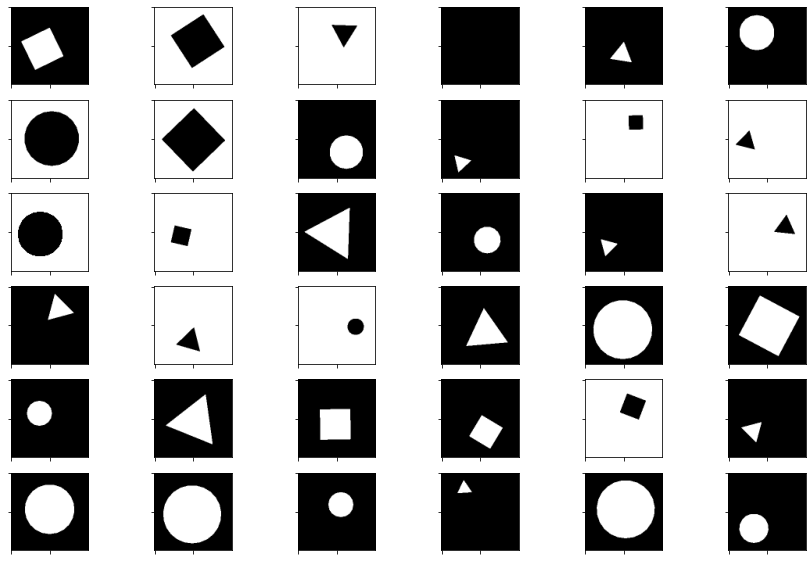

In [10]:
#initialize a subplot to hold the images
dim = 6
fig, ax = plt.subplots(dim, dim, figsize=(15,10))

for i in range(dim):
    for j in range(dim):
        ax[i,j].imshow(data[random.randint(0, len(data)-1)], cmap='gray') #display random image from set
        ax[i,j].set_xticklabels([]) #remove x ticks
        ax[i,j].set_yticklabels([]) #remove y ticks

## 4. Split data into training and testing

In [11]:
#Convert images and labels to numpy arrays
training_images = np.array(data)
training_labels = np.array(class_labels)

#Convert labels into One-Hot Encoded labels
training_labels = to_categorical(training_labels, num_classes = 3)

#Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(training_images, training_labels,   
                                                    test_size = 0.2, random_state = 42, shuffle=True)

#Regularize images to ease computation
x_train = x_train/255
x_test = x_test/255

#Reshape, adding a channels dimension
x_train = x_train.reshape(-1,100,100,1)
x_test = x_test.reshape(-1,100,100,1)

#Verify dimensions of training and testing sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 100, 100, 1)
(6000, 100, 100, 1)
(24000, 3)
(6000, 3)


## 5. Convolutional Neural Network Setup

In [12]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = "same", activation = "relu", input_shape = (100,100,1)))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2))

#fully connected neural network
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation = "softmax"))

## 6. Compile and fit the model

In [13]:
#compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#fit the model on the training and testing sets
history = model.fit(x_train, y_train, batch_size = 128, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
188/188 [==============================] - 51s 260ms/step - loss: 1.0151 - accuracy: 0.4593 - val_loss: 0.9112 - val_accuracy: 0.5685
Epoch 2/20
188/188 [==============================] - 43s 226ms/step - loss: 0.8320 - accuracy: 0.6051 - val_loss: 0.7288 - val_accuracy: 0.6903
Epoch 3/20
188/188 [==============================] - 45s 239ms/step - loss: 0.6579 - accuracy: 0.7035 - val_loss: 0.5828 - val_accuracy: 0.7435
Epoch 4/20
188/188 [==============================] - 46s 246ms/step - loss: 0.5414 - accuracy: 0.7648 - val_loss: 0.4546 - val_accuracy: 0.8283
Epoch 5/20
188/188 [==============================] - 43s 229ms/step - loss: 0.4457 - accuracy: 0.8102 - val_loss: 0.4005 - val_accuracy: 0.8278
Epoch 6/20
188/188 [==============================] - 49s 262ms/step - loss: 0.3917 - accuracy: 0.8341 - val_loss: 0.3254 - val_accuracy: 0.8682
Epoch 7/20
188/188 [==============================] - 45s 237ms/step - loss: 0.3261 - accuracy: 0.8672 - val_loss: 0.2933 - val_ac

## 7. Evaluate training loss vs validation loss

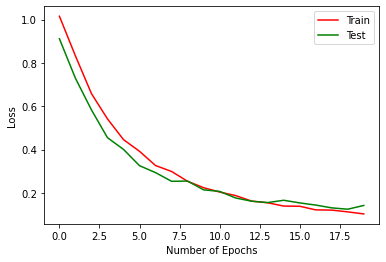

In [14]:
#check the loss
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'g')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

## 8. Evaluate training accuracy vs validation accuracy

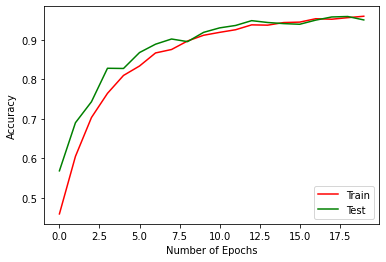

In [15]:
#check the accuracy
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'g')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.show()

## 9. Display Accuracy of Model

In [16]:
model_accuracy = model.evaluate(x_test,y_test, verbose = 0)
print("accuracy of model: ", model_accuracy[1])

accuracy of model:  0.9508333206176758


## 10. Confusion Matrix

188/188 [==============================] - 3s 16ms/step


<AxesSubplot: >

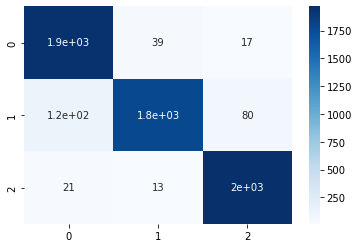

In [22]:
#labels predicted from model
y_pred = np.argmax(model.predict(x_test), axis=1)
#true, testing labels
y_true = np.argmax(y_test, axis=1)
#confusion matrix to display results
conf_mat = confusion_matrix(y_true, y_pred_class, labels=[0,1,2])
sns.heatmap(conf_mat, annot=True, cmap="Blues")